In [1]:
from csdTools import csd, welch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import signal
import matplotlib.ticker as mticker
#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'figure.figsize': (16, 12),
          'xtick.labelsize':'xx-large',
          'ytick.labelsize':'xx-large',
          'text.usetex': False,
          'lines.linewidth': 4,
          'font.family': 'serif',
          'font.serif': 'Georgia',
          'font.size': 20,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
          'axes.labelsize': 'medium',
          'axes.titlesize':'medium',
          'axes.grid.axis': 'both',
          'axes.grid.which': 'both',
          'axes.grid': True,
          'grid.color': 'xkcd:cement',
          'grid.alpha': 0.3,
          'lines.markersize': 12,
          'lines.linewidth': 2.0,
          'legend.borderpad': 0.2,
          'legend.fancybox': True,
          'legend.fontsize': 'medium',
          'legend.framealpha': 0.8,
          'legend.handletextpad': 0.5,
          'legend.labelspacing': 0.33,
          'legend.loc': 'best',
          'savefig.dpi': 140,
          'savefig.bbox': 'tight',
          'pdf.compression': 9}
pylab.rcParams.update(params)
#********************************************************************************************************

In [2]:
fs = 10e3
N = 1e6
amp = 20
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
b, a = signal.butter(2, 0.25, 'low')
x = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
y = signal.lfilter(b, a, x)
x += amp*np.sin(2*np.pi*freq*time)
y += np.random.normal(scale=0.1*np.sqrt(noise_power), size=time.shape)

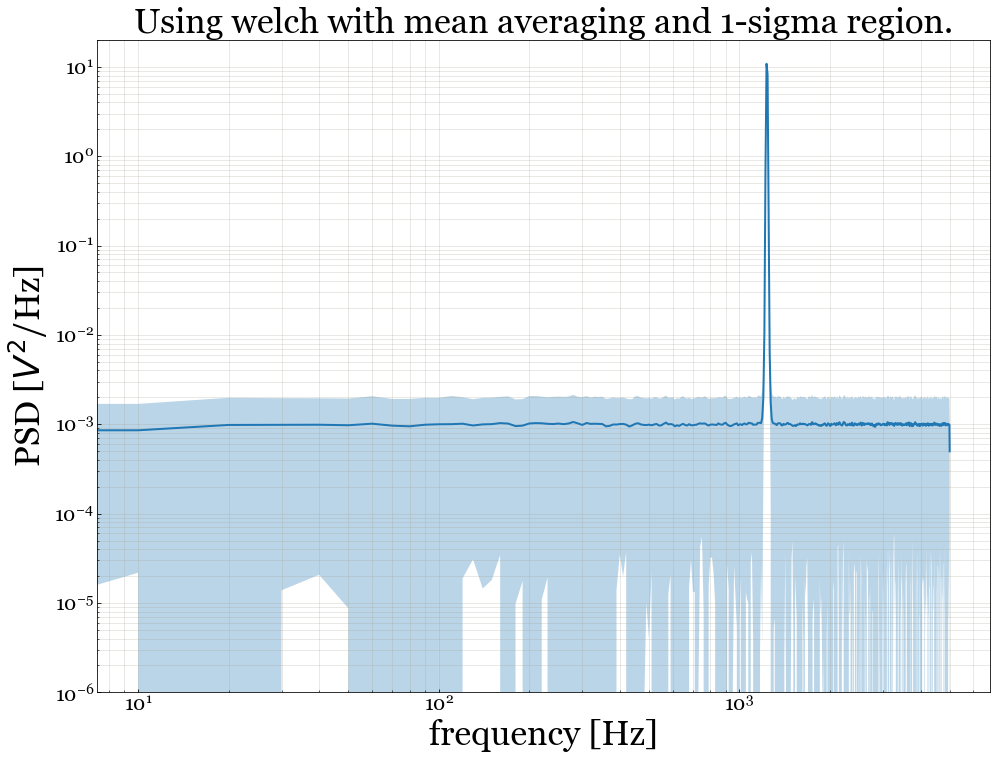

In [3]:
f, Pxx, Pxxstd = welch(x, fs, nperseg=1000, average='mean', getUnc=True)
fig, ax = plt.subplots(1, 1, figsize=[16, 12])
ax.plot(f, np.abs(Pxx))
ax.fill_between(f, np.abs(Pxx) - np.abs(Pxxstd), np.abs(Pxx) + np.abs(Pxxstd), alpha=0.3)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-6, 2e1)
ax.set_xlabel('frequency [Hz]', fontsize='xx-large')
ax.set_ylabel('PSD [$V^2$/Hz]', fontsize='xx-large')
ax.set_title('Using welch with mean averaging and 1-sigma region.',
             fontsize='xx-large')
fig.savefig('welchMeanExample.png', bbox_inches='tight')

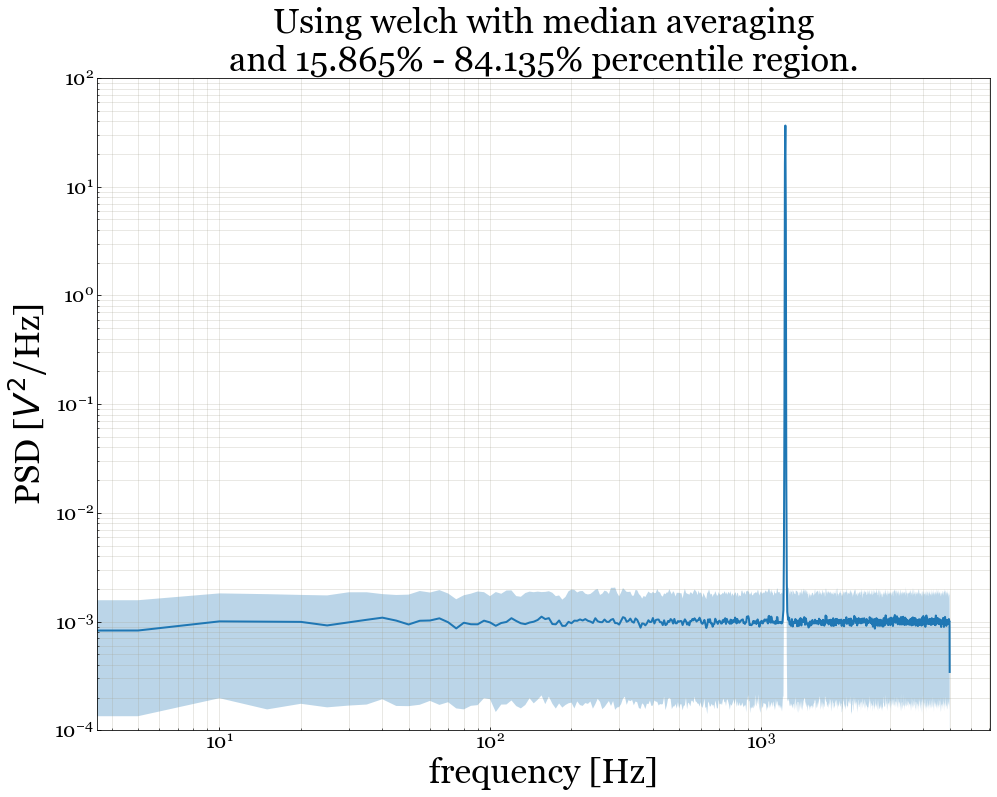

In [4]:
f, Pxx, Pxxlb, Pxxub = welch(x, fs, nperseg=2000, average='median', getUnc=True)
fig, ax = plt.subplots(1, 1, figsize=[16, 12])
ax.plot(f, np.abs(Pxx))
ax.fill_between(f, np.abs(Pxxlb), np.abs(Pxxub), alpha=0.3)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-4, 1e2)
ax.set_xlabel('frequency [Hz]', fontsize='xx-large')
ax.set_ylabel('PSD [$V^2$/Hz]', fontsize='xx-large')
ax.set_title('Using welch with median averaging\nand 15.865% - 84.135% percentile region.',
             fontsize='xx-large')
fig.savefig('welchMedianExample.png', bbox_inches='tight')

In [5]:
f, Pxy = csd(x, y, fs, nperseg=1024, average='no', getUnc=True)

In [6]:
Pxyhist = np.zeros((Pxy.shape[0], 70))
bins = np.arange(-7, 0.1, 0.1)
for row in range(Pxy.shape[0]):
    Pxyhist[row, :], be = np.histogram(np.log10(np.abs(Pxy[row, :])), bins=bins)
    Pxyhist[row, :] /= np.linalg.norm(Pxyhist[row, :])

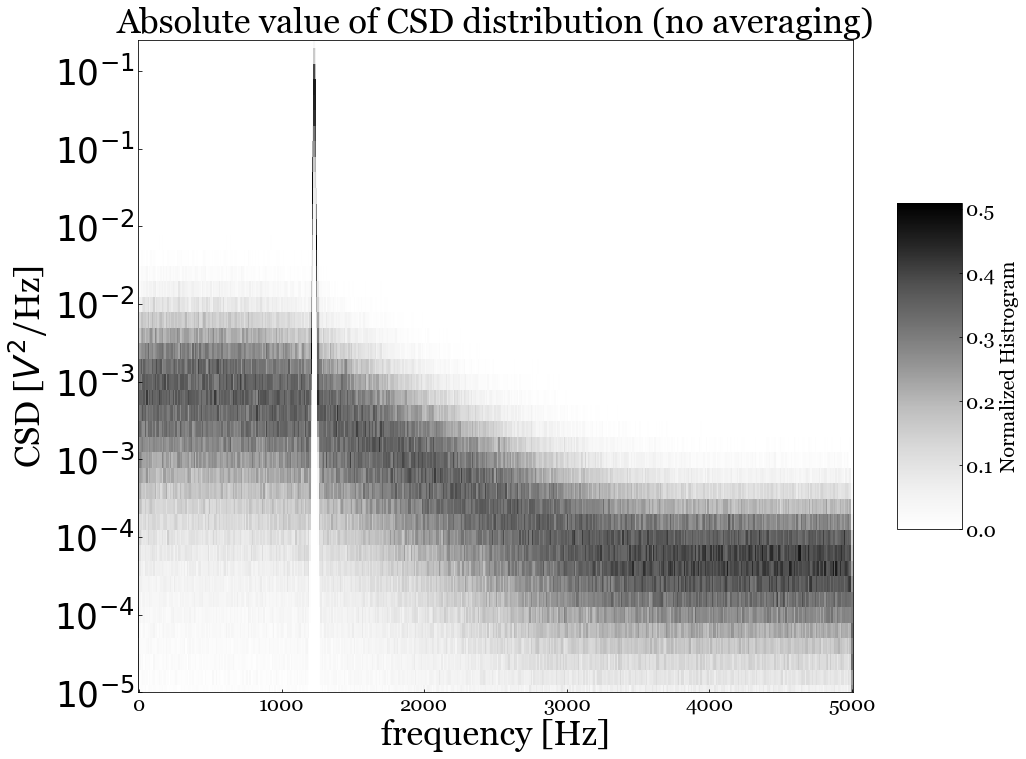

In [7]:
fig = plt.figure(figsize=[16,12])
ax = fig.gca()
X, Y = np.meshgrid(f, be[:-1])
Z = np.transpose(Pxyhist)
pcm = ax.pcolormesh(X, Y, Z, cmap=cm.Greys, shading='auto')
ax.set_ylim(-5, -0.8)
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels([r'$10^{' + str(int(ele)) + '}$' for ele in ticks_loc], fontsize='xx-large')
ax.set_xlabel('frequency [Hz]', fontsize='xx-large')
ax.set_ylabel('CSD [$V^2$/Hz]', fontsize='xx-large')

ax.set_title('Absolute value of CSD distribution (no averaging)', fontsize='xx-large')

# Add a color bar which maps values to colors.
fig.colorbar(pcm, shrink=0.5, aspect=5, label='Normalized Histrogram')
fig.savefig('csdNoAvgExample.png', bbox_inches='tight')